<a href="https://colab.research.google.com/github/mirellagarcia/interpretando_dados/blob/main/dados_diversos_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##7.6. Exercício

Faça uma análise dos nascidos vivos de SE em 2017 para:

*   Fazer o boxplot para idade da mãe e encontrar quais os registro de outliers.
*   Fazer o boxplot para o peso da criança e encontrar quais os registro de outliers.
*   Fazer o histograma da idade do pai
*   Representar visualmente os diferentes valores de APGAR1 e APGAR5
*   Mostrar a dispersão entre idade do pai e idade da mãe
*   Mostrar visualmente a comparação entre idade da mãe e idade do pai para as mães solteiras com menos de 18 anos
*   Comparar a frequência dos anos de escolaridade das mães para que residem na capital (Aracajú, CODMUNRES 2800308) e das mães em outras cidades (outros CODMUNRES).



In [2]:
#Preparação do Ambiente
#importar pandas
import pandas as pd
#montar drive para ler os arquivos
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#Colocando o caminho do arquivo em uma variavel
caminho = ("/content/drive/MyDrive/DNSE2017.csv")

In [9]:
#Ler aqruivo
sinasc = pd.read_csv(caminho, dtype=str)

sinasc.PESO = pd.to_numeric(sinasc.PESO)
sinasc.IDADEMAE = pd.to_numeric(sinasc.IDADEMAE).astype(pd.Int64Dtype())
sinasc.IDADEPAI = pd.to_numeric(sinasc.IDADEPAI).astype(pd.Int64Dtype())
sinasc.QTDFILVIVO = pd.to_numeric(sinasc.QTDFILVIVO).astype(pd.Int64Dtype())
sinasc.QTDFILMORT = pd.to_numeric(sinasc.QTDFILMORT).astype(pd.Int64Dtype())
sinasc.APGAR1 = pd.to_numeric(sinasc.APGAR1).astype(pd.Int64Dtype())
sinasc.APGAR5 = pd.to_numeric(sinasc.APGAR5).astype(pd.Int64Dtype())
sinasc.SEMAGESTAC = pd.to_numeric(sinasc.SEMAGESTAC).astype(pd.Int64Dtype())
sinasc.CONSPRENAT = pd.to_numeric(sinasc.CONSPRENAT).astype(pd.Int64Dtype())
sinasc.SERIESCMAE = pd.to_numeric(sinasc.SERIESCMAE).astype(pd.Int64Dtype())
sinasc.QTDPARTCES = pd.to_numeric(sinasc.QTDPARTCES).astype(pd.Int64Dtype())
sinasc.QTDPARTNOR = pd.to_numeric(sinasc.QTDPARTNOR).astype(pd.Int64Dtype())
sinasc.QTDGESTANT = pd.to_numeric(sinasc.QTDGESTANT).astype(pd.Int64Dtype())

,IDADEMAE
22,47
3110,47
3575,47
3922,49
8371,48
12520,47
17054,47
18699,48
20801,50
23171,47


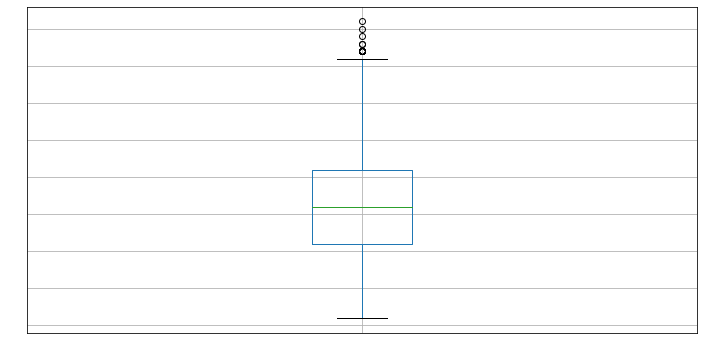

In [16]:
#Idade da mãe
bp = sinasc.boxplot(column=['IDADEMAE'], figsize=(12,6))
bp.tick_params(colors='white')
bp.xaxis.label.set_color('white')
bp.yaxis.label.set_color('white')
#identificação dos outliers
q = sinasc.IDADEMAE.quantile([0.25, 0.75]).values
limit_inf = q[0] - (q[1] - q[0]) * 1.5
limit_sup = q[1] + (q[1] - q[0]) * 1.5
sinasc_outliers = sinasc[(sinasc.IDADEMAE < limit_inf) | (sinasc.IDADEMAE > limit_sup)]
sinasc_outliers[['IDADEMAE']]

,PESO
30,1455.0
76,5570.0
119,4630.0
146,1830.0
147,1740.0
...,...
33783,1520.0
33817,4600.0
33826,4800.0
33833,5190.0


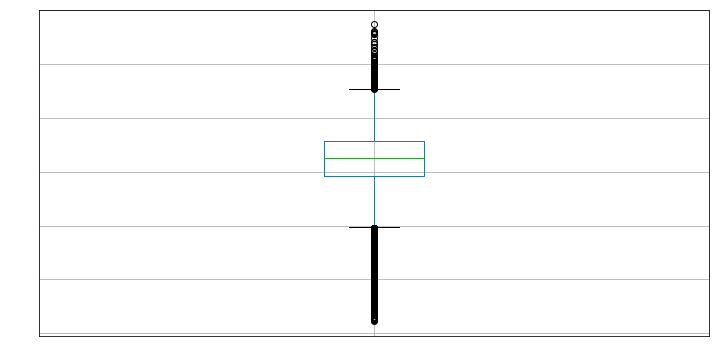

In [17]:
#Peso
bp = sinasc.boxplot(column=['PESO'], figsize=(12,6))
bp.tick_params(colors='white')
bp.xaxis.label.set_color('white')
bp.yaxis.label.set_color('white')
#Identificação dos outliers
q2 = sinasc.PESO.quantile([0.25, 0.75]).values
limit_inf = q2[0] - (q2[1] - q2[0]) * 1.5
limit_sup = q2[1] + (q2[1] - q2[0]) * 1.5
sinasc_outliers = sinasc[(sinasc.PESO < limit_inf) | (sinasc.PESO > limit_sup)]
sinasc_outliers[['PESO']]

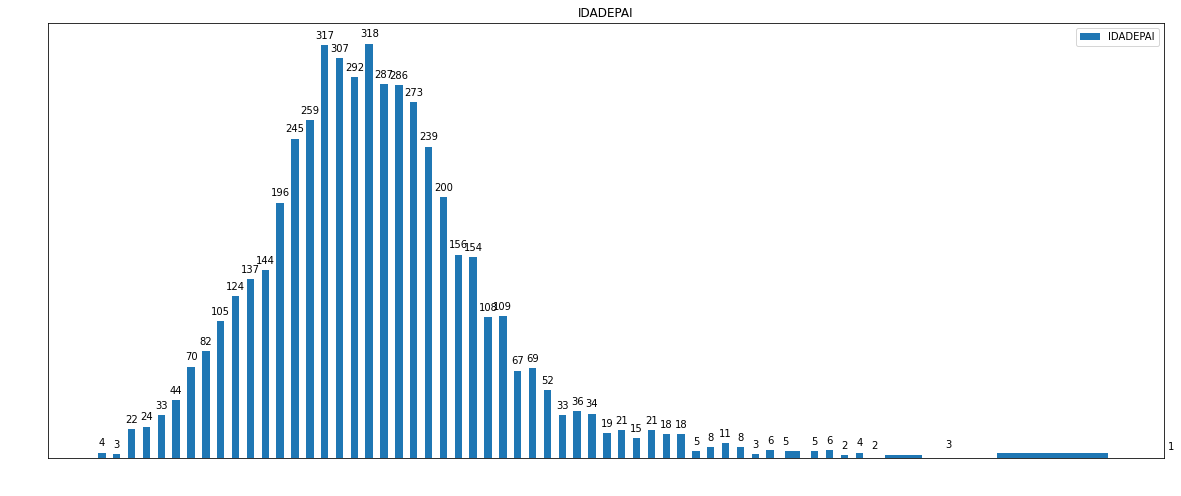

In [21]:
#Histograma Idade do pai
bins_values = sinasc.IDADEPAI.value_counts(sort=False)
histograma = sinasc.hist(
    column='IDADEPAI', bins=sorted(bins_values.keys()), grid=False, figsize=(20,8), rwidth=0.5, legend=True
)

histograma[0][0].tick_params(colors='white')
histograma[0][0].xaxis.label.set_color('white')
histograma[0][0].yaxis.label.set_color('white')
r = histograma[0][0].set_xlabel('Idade')
r = histograma[0][0].set_ylabel('Fequência')
r = histograma[0][0].set_ylabel('Fequência')

x_ticks = []
for key, value in bins_values.items():
  x_ticks.append(key)
  histograma[0][0].text(key+0.5, value+5, int(value), ha='center')
t = histograma[0][0].set_xticks(x_ticks)


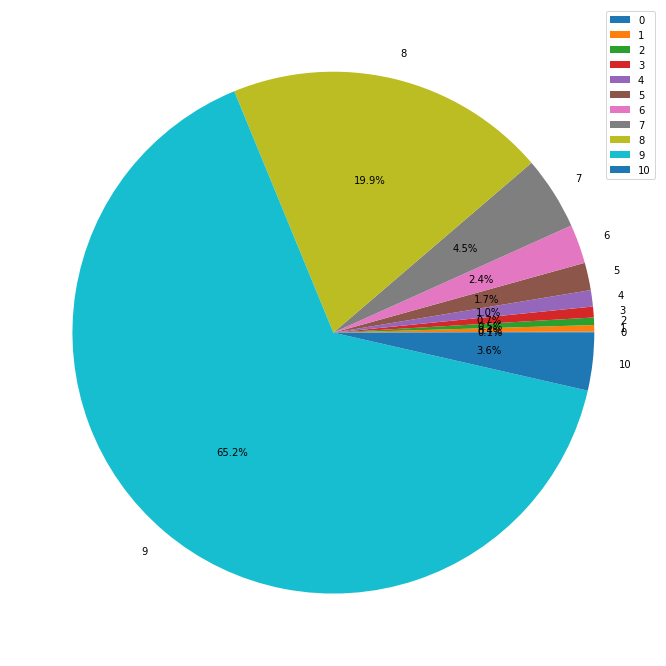

In [25]:
#APGAR 1 com grágico de pizza
grupo = sinasc.groupby(by='APGAR1').count()
pizza = grupo[['contador']].plot(y='contador',  kind='pie', autopct='%1.1f%%', figsize=(20,12))
r = pizza.set(xlabel='', ylabel='')

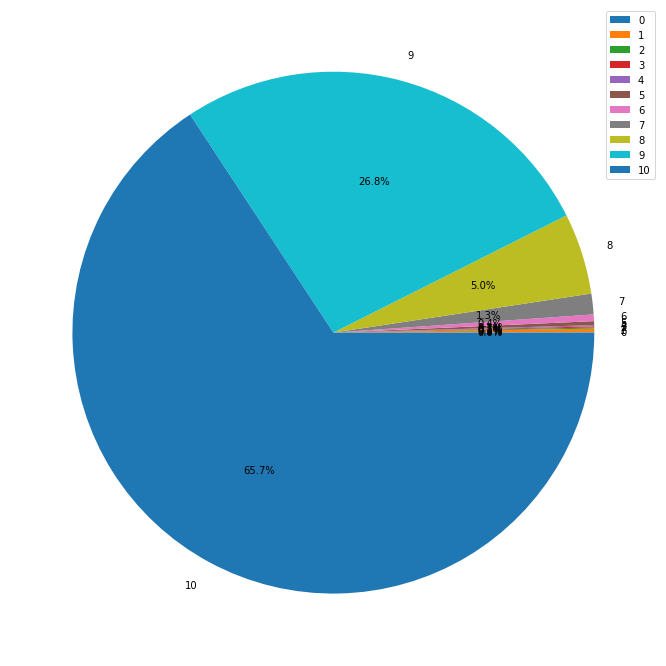

In [26]:
#APGAR 5 com grágico de pizza
grupo = sinasc.groupby(by='APGAR5').count()
pizza = grupo[['contador']].plot(y='contador',  kind='pie', autopct='%1.1f%%', figsize=(20,12))
r = pizza.set(xlabel='', ylabel='')

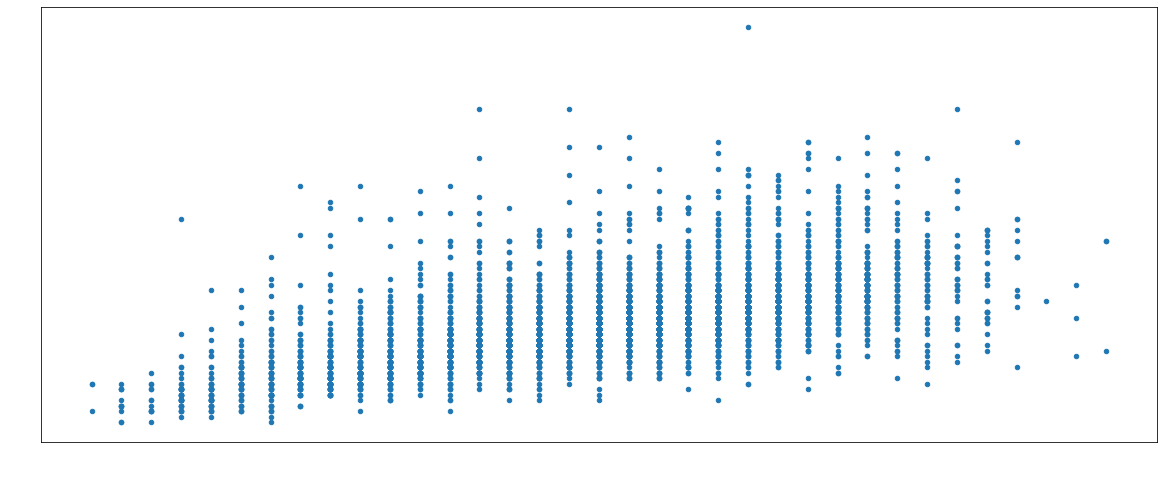

In [27]:
#Dispersão entre idade do pai e idade da mão
idades = sinasc[(sinasc.IDADEPAI.notna())][['IDADEMAE', 'IDADEPAI']]
disp = idades.plot(kind='scatter',x='IDADEMAE', y='IDADEPAI', figsize=(20,8))
disp.tick_params(colors='white')
disp.xaxis.label.set_color('white')
disp.yaxis.label.set_color('white')

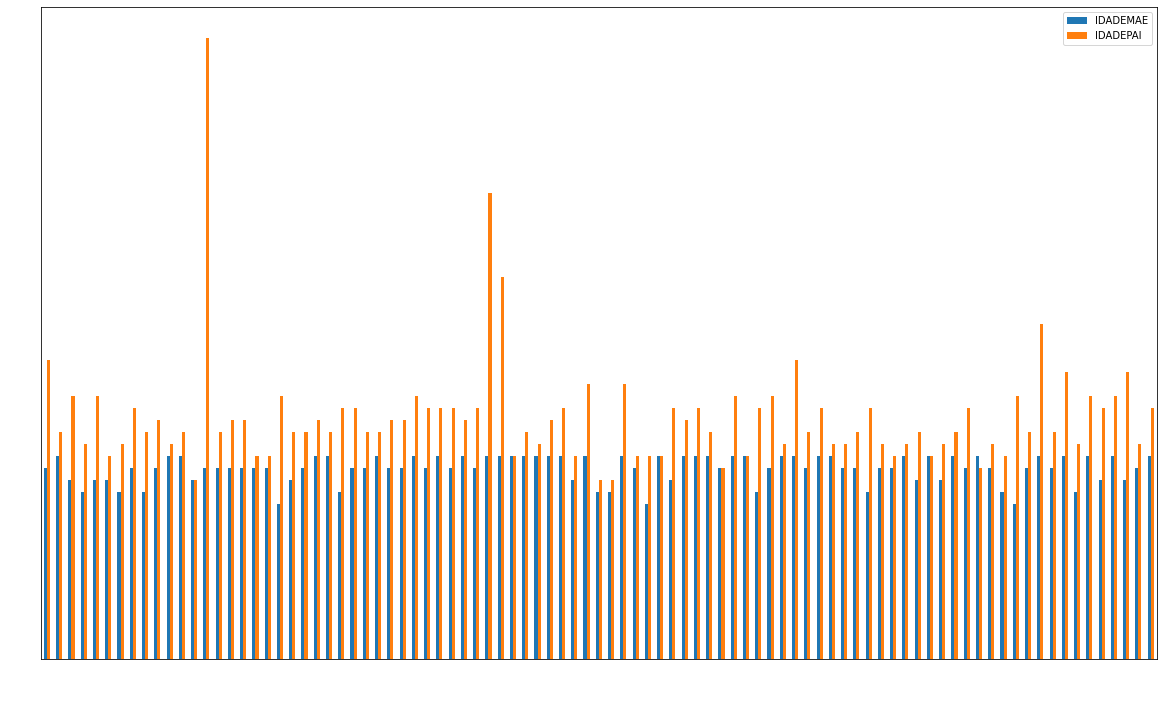

In [31]:
#Comparação entre idade da mãe e idade do pai para as mães solteiras com menos de 18 anos
idades = sinasc[(sinasc.IDADEMAE < 18) & (sinasc.ESTCIVMAE== '1') & (sinasc.IDADEPAI.notna())][['IDADEMAE', 'IDADEPAI']]
barras = idades.plot(kind='bar', width=0.50, figsize=(20,12))
barras.tick_params(colors='white')
barras.xaxis.label.set_color('white')
barras.yaxis.label.set_color('white')
r = barras.set(xlabel='Observação', ylabel='Idade')

In [33]:
#Comparação de escolaridade entre residência na capital e outras cidades
capital = sinasc[sinasc.CODMUNRES == '280030']
outras = sinasc[sinasc.CODMUNRES != '280030']

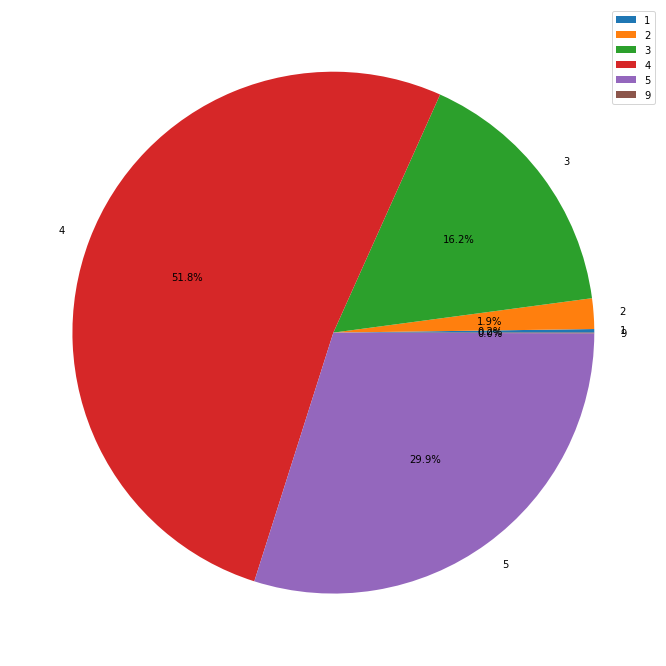

In [35]:
#Gráfico de pizza da capital
grupo = capital.groupby(by='ESCMAE').count()
pizza = grupo[['contador']].plot(y='contador',  kind='pie', autopct='%1.1f%%', figsize=(20,12))
r = pizza.set(xlabel='', ylabel='')

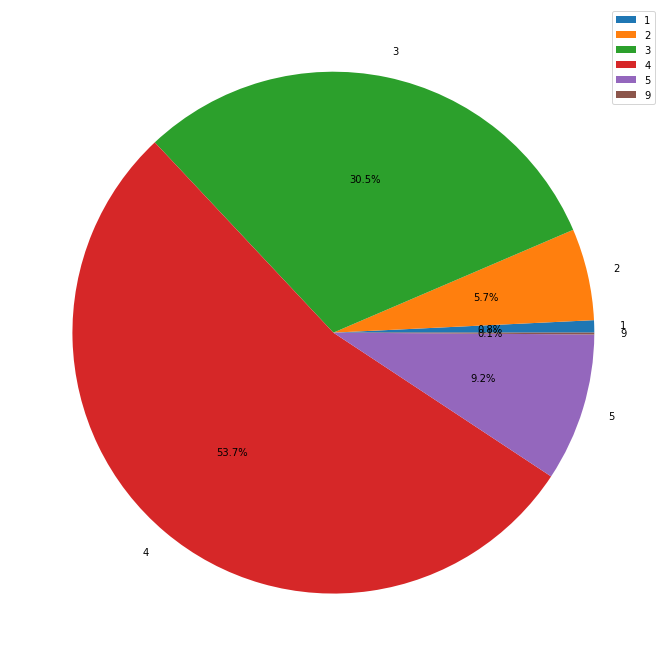

In [37]:
#Gráfico de pizza de outras cidades
grupo = outras.groupby(by='ESCMAE').count()
pizza = grupo[['contador']].plot(y='contador',  kind='pie', autopct='%1.1f%%', figsize=(20,12))
r = pizza.set(xlabel='', ylabel='')